In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
crashes = pd.read_csv('traffic_crashes.csv')
crashes.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [5]:
crashes = crashes[["CRASH_DATE","TRAFFICWAY_TYPE", "ROADWAY_SURFACE_COND", "LIGHTING_CONDITION", "POSTED_SPEED_LIMIT", "ROAD_DEFECT", "MOST_SEVERE_INJURY", "INJURIES_FATAL", "DAMAGE", "CRASH_HOUR", "CRASH_TYPE"]].copy()
crashes.head()

,CRASH_DATE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,POSTED_SPEED_LIMIT,ROAD_DEFECT,MOST_SEVERE_INJURY,INJURIES_FATAL,DAMAGE,CRASH_HOUR,CRASH_TYPE
0,07/04/2019 10:33:00 PM,DIVIDED - W/MEDIAN BARRIER,DRY,"DARKNESS, LIGHTED ROAD",45,NO DEFECTS,NaN,NaN,"OVER $1,500",22,NO INJURY / DRIVE AWAY
1,07/30/2019 10:22:00 AM,DIVIDED - W/MEDIAN (NOT RAISED),DRY,DAYLIGHT,30,NO DEFECTS,NaN,NaN,"OVER $1,500",10,NO INJURY / DRIVE AWAY
2,08/10/2019 05:00:00 PM,ONE-WAY,DRY,DAYLIGHT,25,NO DEFECTS,NaN,NaN,"$501 - $1,500",17,NO INJURY / DRIVE AWAY
3,08/16/2019 04:53:00 PM,NOT DIVIDED,DRY,DAYLIGHT,30,NO DEFECTS,NO INDICATION OF INJURY,0.0,"$501 - $1,500",16,NO INJURY / DRIVE AWAY
4,08/17/2019 04:04:00 PM,PARKING LOT,DRY,DAYLIGHT,30,NO DEFECTS,NO INDICATION OF INJURY,0.0,"$501 - $1,500",16,NO INJURY / DRIVE AWAY


In [25]:
crashes["ROADWAY_SURFACE_COND"].value_counts()

DRY                263718
WET                 48731
UNKNOWN             22967
SNOW OR SLUSH       11975
ICE                  2445
OTHER                 832
SAND, MUD, DIRT       177
Name: ROADWAY_SURFACE_COND, dtype: int64

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1,2,3,4,5,6,7])
le.classes_
le.transform([1,2,3,4,5,6,7])
le.inverse_transform([1,2,3,4,5,6])

array([2, 3, 4, 5, 6, 7])

In [13]:
le = preprocessing.LabelEncoder()
le.fit(["DRY", "ICE", "SNOW OR SLUSH", "SAND,MUD, DIRT", "OTHER"])

list(le.classes_)

le.transform(["DRY", "ICE", "SNOW OR SLUSH", "SAND,MUD, DIRT", "OTHER"]) 

list(le.inverse_transform([1,2,3,4]))



['ICE', 'OTHER', 'SAND,MUD, DIRT', 'SNOW OR SLUSH']

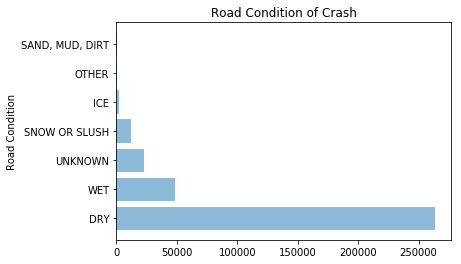

In [28]:
objects = ("DRY", "WET", "UNKNOWN", "SNOW OR SLUSH", "ICE","OTHER","SAND, MUD, DIRT")
y_pos = np.arange(len(objects))
performance = [263718,48731,22967,11975,2445,832,177]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Road Condition')
plt.title('Road Condition of Crash')

plt.show()